In [1]:
import pandas as pd

In [2]:
#Importemos y guardemos los datos

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/220221COVID19MEXICO.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:


num=len(df['ID_REGISTRO'])
fecha_actualizacion=df['FECHA_ACTUALIZACION'][0]
print(f'La base de datos tiene {num} registros con fecha de {fecha_actualizacion}')


La base de datos tiene 14895473 registros con fecha de 2022-02-21


In [4]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [5]:
#Eliminemos las columnas innecesarias para nuestro análisis

df = df.drop(columns=['ID_REGISTRO','ORIGEN','SECTOR','ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES','ENTIDAD_UM', 'ID_REGISTRO', 'INDIGENA', 'HABLA_LENGUA_INDIG'])
df = df.drop(columns=['TOMA_MUESTRA_LAB', 'RESULTADO_LAB', 'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO'])
df = df.drop(columns=['EMBARAZO','MIGRANTE', 'NACIONALIDAD', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN'])
df = df.drop(columns=['FECHA_ACTUALIZACION'])


In [6]:
#Tomemos los datos que según el catálogo de la base de datos representan casos confirmados de COVID-19
#Aquí usamos len porque aún corresponde el indice con la iteración de un for.
import numpy as np
from numpy.ma.core import append
lista=[]
for i in range(len(df['CLASIFICACION_FINAL'])):
  numero=df['CLASIFICACION_FINAL'][i]
  i=i+1
  if numero == 1 or numero ==2 or numero ==3:
    lista.append(1)
  else:
    lista.append(0)
df['CLASIFICACION_FINAL']=lista
cc = df[df['CLASIFICACION_FINAL']>0]
cc = cc.drop(columns=['CLASIFICACION_FINAL'])
numero=len(cc['INTUBADO'])
print(f'Tenemos entonces {numero} casos confirmados')

Tenemos entonces 5418257 casos confirmados


In [7]:
cc.head()

,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI
4,2,1,2020-10-10,2020-10-01,9999-99-99,97,2,42,2,2,2,2,2,2,2,2,2,2,2,97
5,1,2,2020-11-09,2020-11-02,9999-99-99,2,2,49,2,2,2,2,2,2,2,2,2,2,1,2
6,1,1,2020-12-15,2020-12-12,9999-99-99,97,2,43,2,2,2,2,2,2,2,2,2,2,1,97
11,2,2,2020-07-01,2020-06-26,9999-99-99,2,1,12,1,2,2,2,2,2,2,2,2,2,1,2
12,1,1,2020-10-07,2020-10-06,9999-99-99,97,2,38,2,2,2,2,2,2,2,2,2,2,1,97


In [8]:
#Busquemos ahora los registros con fecha de defunción y tomemos ese dato

In [9]:
pip install plotly

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.frame import DataFrame

In [11]:
#Para ello tomaremos una lista de las fechas y la convertiremos en un data frame con datos tipo fecha

lista=[]
for i in cc.index:
  fecha=cc['FECHA_DEF'][i]
  i=i+1
  if fecha <"9999-99-99":
    lista.append(fecha)

fechas_defunciones=pd.to_datetime(lista)

In [12]:
#Esto nos permite visualizar las defunciones por fecha

import plotly.graph_objects as go
f=plt.figure(figsize=(26, 8))
f = go.Figure(data=[go.Histogram(x=fechas_defunciones)])
f.show()

Output hidden; open in https://colab.research.google.com to view.

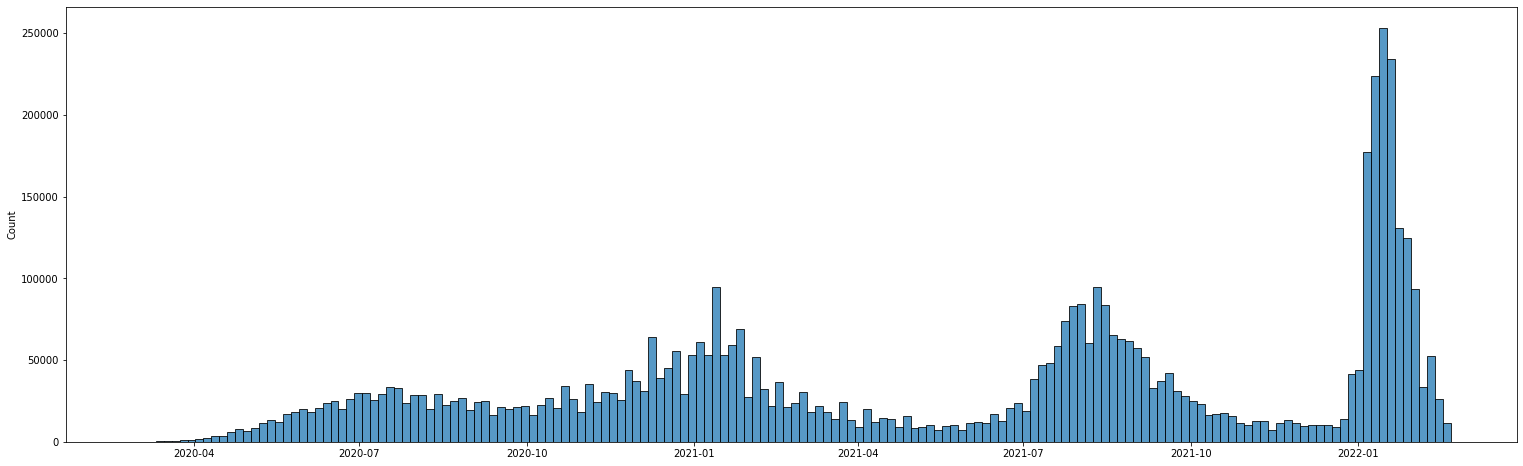

In [13]:
#Intentemos entonces una visualización similar pero de todos los casos confirmados
#Colab no parece ser capaz de aplicar el mismo método a este set mucho mayor de datos por lo que usaremos histplot

lista=[]
for i in cc.index:
  fecha=cc['FECHA_INGRESO'][i]
  i=i+1
  if fecha <"9999-99-99":
    lista.append(fecha)
fechas_casos=pd.to_datetime(lista)
f2=plt.figure(figsize=(26, 8))
f2 = sns.histplot(fechas_casos, kde=False)

In [14]:
#Agregaremos una columna que mide los días que transcurrieron desde presentar síntomas hasta el ingreso en la base de datos

import datetime
from datetime import date

lista=[]
for i in cc.index:
  n=cc['FECHA_INGRESO'][i]
  A=date.fromisoformat(n)
  m=cc['FECHA_SINTOMAS'][i]
  B=date.fromisoformat(m)
  C=A-B
  C = int(C.days)
  lista.append(C)
cc['DIAS_ESPERA']=lista

#Esto nos permite eliminar un par más de columnas
cc = cc.drop(columns=['FECHA_INGRESO',	'FECHA_SINTOMAS'])

In [15]:
#Analicemos esta nueva columna
dias_espera=cc['DIAS_ESPERA'].sort_values(ascending=False)
print(dias_espera)

7726808     430
9751231     328
2011742     174
4664071     153
5331355     137
           ... 
4716448       0
13065082      0
13065085      0
4716435       0
1758539     -13
Name: DIAS_ESPERA, Length: 5418257, dtype: int64


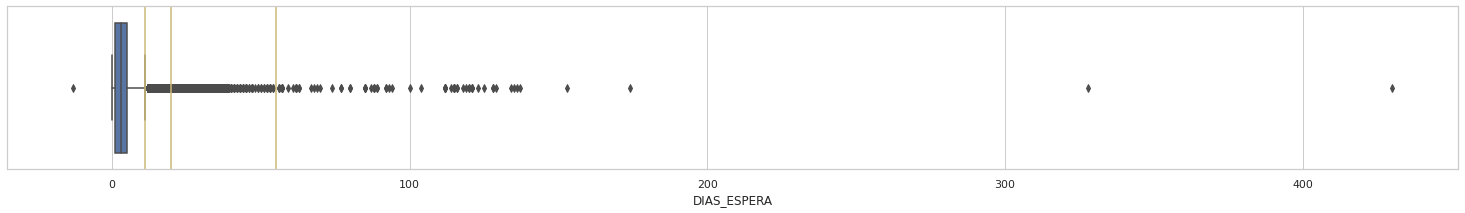

In [16]:
f3=plt.figure(figsize=(26, 3))
f3=sns.set(style="whitegrid")
f3=sns.boxplot(x=dias_espera)
plt.axvline(55, c='y')
plt.axvline(11, c='y')
plt.axvline(20, c='y')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



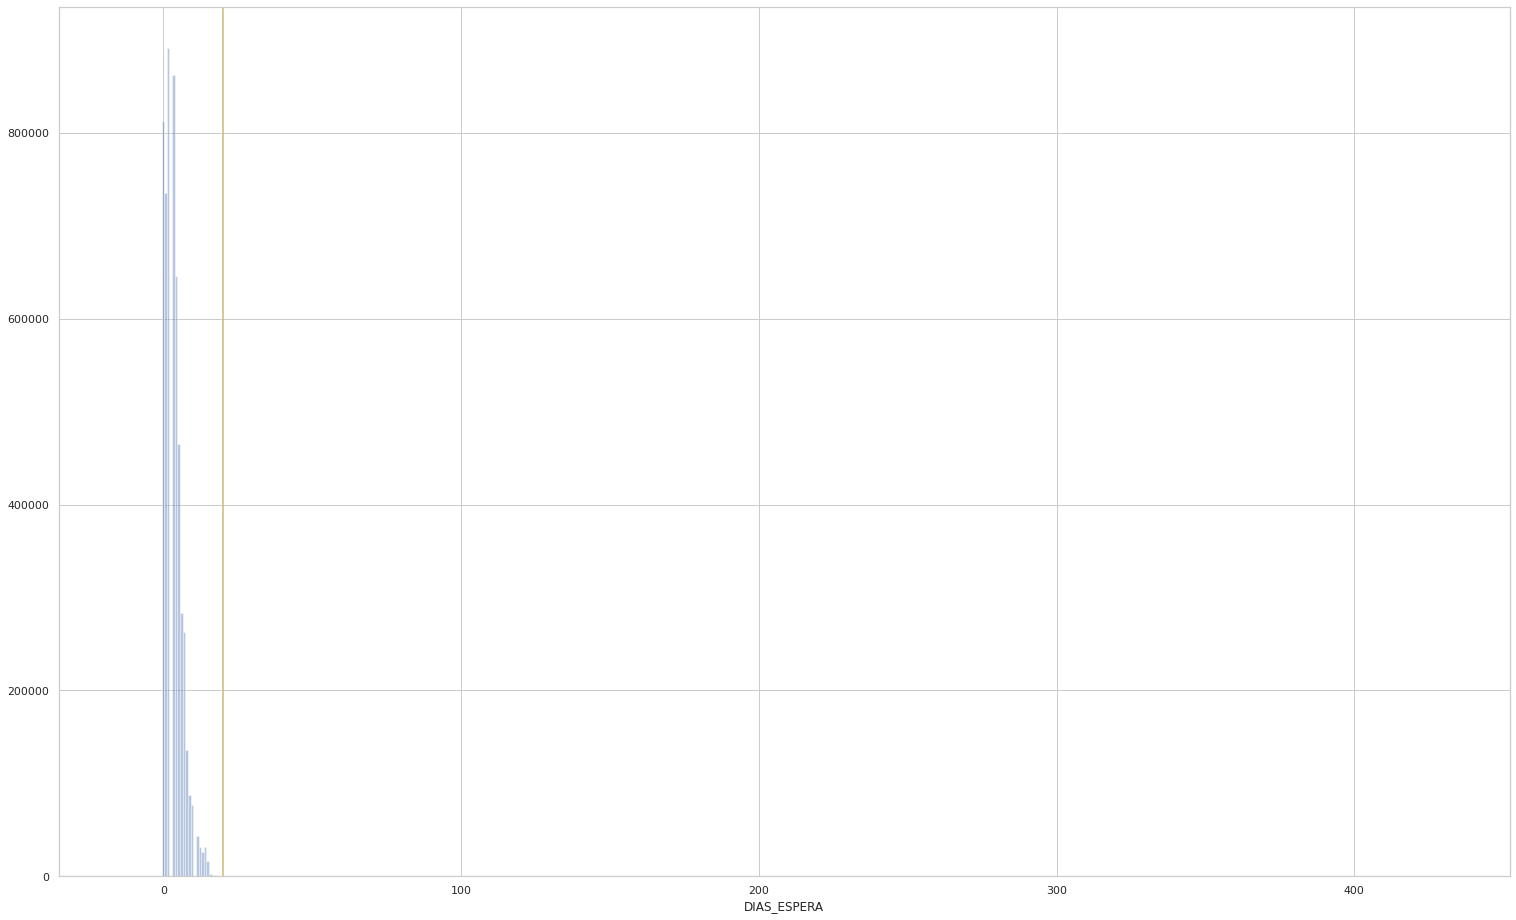

In [17]:
f4=plt.figure(figsize=(26, 16))
f4=sns.set(style='whitegrid')
f4=sns.distplot(dias_espera, kde=False, norm_hist=False, bins=500)
plt.axvline(20, c='y')

In [18]:
iqr = dias_espera.quantile(0.75) - dias_espera.quantile(0.25)
filtro_inferior = dias_espera > dias_espera.quantile(0.25) - (iqr * 1.5)
filtro_superior = dias_espera < dias_espera.quantile(0.75) + (iqr * 1.5)

In [19]:
diasespera_filtrado = dias_espera[filtro_inferior & filtro_superior]
print(diasespera_filtrado)

42994       10
5194648     10
12913673    10
4216166     10
12199984    10
            ..
13065079     0
4716448      0
13065082     0
13065085     0
4716435      0
Name: DIAS_ESPERA, Length: 5258707, dtype: int64


In [20]:
filtro_inferior = dias_espera >=0
filtro_superior = dias_espera <=20
diasespera_filtrado = dias_espera[filtro_inferior & filtro_superior]
print(diasespera_filtrado)

4478254     20
1147894     20
1746359     20
8578467     20
4580698     20
            ..
13065079     0
4716448      0
13065082     0
13065085     0
4716435      0
Name: DIAS_ESPERA, Length: 5413748, dtype: int64


In [21]:
#Hemos encontrado así los valores atípicos para esta variable ya que con estos filtros peredmos menos del .5% de los datos

In [22]:
#Trabajaremos sólo con los valores típicos
cc['DIAS_ESPERA']=cc['DIAS_ESPERA'][filtro_inferior & filtro_superior]

In [23]:
cc.isna().sum()

SEXO                 0
TIPO_PACIENTE        0
FECHA_DEF            0
INTUBADO             0
NEUMONIA             0
EDAD                 0
DIABETES             0
EPOC                 0
ASMA                 0
INMUSUPR             0
HIPERTENSION         0
OTRA_COM             0
CARDIOVASCULAR       0
OBESIDAD             0
RENAL_CRONICA        0
TABAQUISMO           0
OTRO_CASO            0
UCI                  0
DIAS_ESPERA       4509
dtype: int64

In [24]:
#Eliminemos nas
cc=cc.dropna(axis=0, how='any')
cc.isna().sum()

SEXO              0
TIPO_PACIENTE     0
FECHA_DEF         0
INTUBADO          0
NEUMONIA          0
EDAD              0
DIABETES          0
EPOC              0
ASMA              0
INMUSUPR          0
HIPERTENSION      0
OTRA_COM          0
CARDIOVASCULAR    0
OBESIDAD          0
RENAL_CRONICA     0
TABAQUISMO        0
OTRO_CASO         0
UCI               0
DIAS_ESPERA       0
dtype: int64

10942755    20.0
3160617     20.0
2024854     20.0
9456694     20.0
8770472     20.0
            ... 
12305818     0.0
6946875      0.0
6946873      0.0
8977298      0.0
14895462     0.0
Name: DIAS_ESPERA, Length: 5413748, dtype: float64


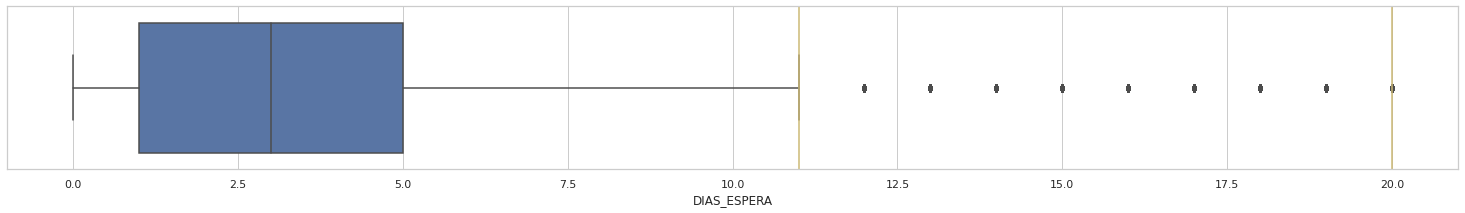

In [25]:
dias_espera2=cc['DIAS_ESPERA'].sort_values(ascending=False)
print(dias_espera2)
f3=plt.figure(figsize=(26, 3))
f3=sns.set(style="whitegrid")
f3=sns.boxplot(x=dias_espera2)
plt.axvline(20, c='y')
plt.axvline(11, c='y')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



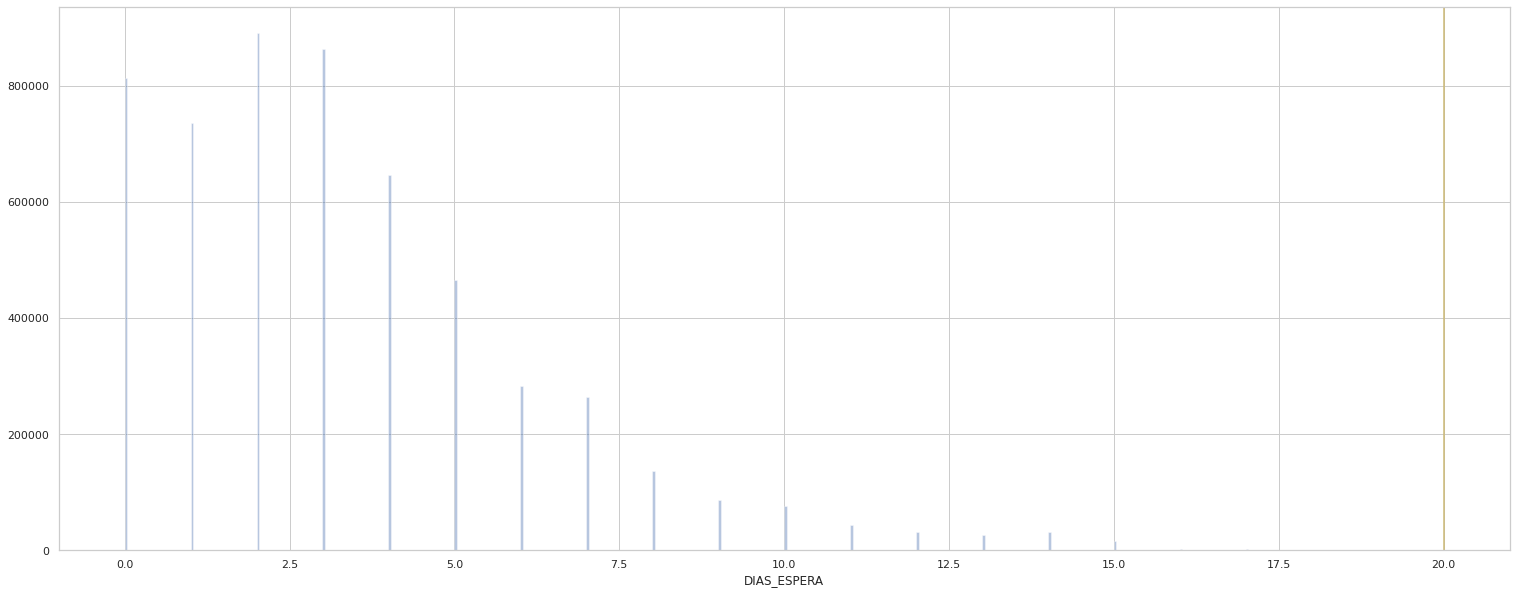

In [26]:
f4=plt.figure(figsize=(26, 10))
f4=sns.set(style='whitegrid')
f4=sns.distplot(dias_espera2, kde=False, norm_hist=False, bins=500)
plt.axvline(20, c='y')

In [27]:
#Sigamos procesando los datos

In [28]:
#La columna de tipo de paciente nos indica paciente hospitalizado con el valor de 2, así que transformaremos ese valor en un 1 
#La columna de sexo nos indica sexo masculino con valor de 2, transformaremos ese dato a valor de 1 para analizar la relación con las demás variables
columnas=['SEXO','TIPO_PACIENTE']
for a in columnas:

  lista=[]
  for i in cc.index:
    if cc[a][i] == 2:
      lista.append(1)
    else:
      lista.append(0)
    i=i+1
  cc[a]=lista 

In [29]:
#Transformemos ahora los datos categóricos en datos binarios denotando la presencia de comorbididades con valores de 1 y ausencia con valores de 0
#Todas estas columnas indican la presencia con un 1, pero también incluyen datos omitido o no aplicables
columnas=['INTUBADO', 'NEUMONIA', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'UCI']
  
for a in columnas:

  lista=[]
  numero=0
  for i in cc.index:
    if cc[a][i] == 1:
      lista.append(1)
    else:
      lista.append(0)
    i=i+1
  cc[a]=lista 

In [30]:
#También agregaremos una columna que indique si el caso resultó en una defunción
lista=[]
for i in cc.index:
  fecha=cc['FECHA_DEF'][i]
  if fecha <"9999-99-99":
    lista.append(1)
  else:
    lista.append(0)
cc['DEF']=lista

In [31]:
#Finalmente eso nos deja un dataframe que luce así
cc.head()

,SEXO,TIPO_PACIENTE,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI,DIAS_ESPERA,DEF
4,1,0,9999-99-99,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,9.0,0
5,0,1,9999-99-99,0,0,49,0,0,0,0,0,0,0,0,0,0,1,0,7.0,0
6,0,0,9999-99-99,0,0,43,0,0,0,0,0,0,0,0,0,0,1,0,3.0,0
11,1,1,9999-99-99,0,1,12,1,0,0,0,0,0,0,0,0,0,1,0,5.0,0
12,0,0,9999-99-99,0,0,38,0,0,0,0,0,0,0,0,0,0,1,0,1.0,0


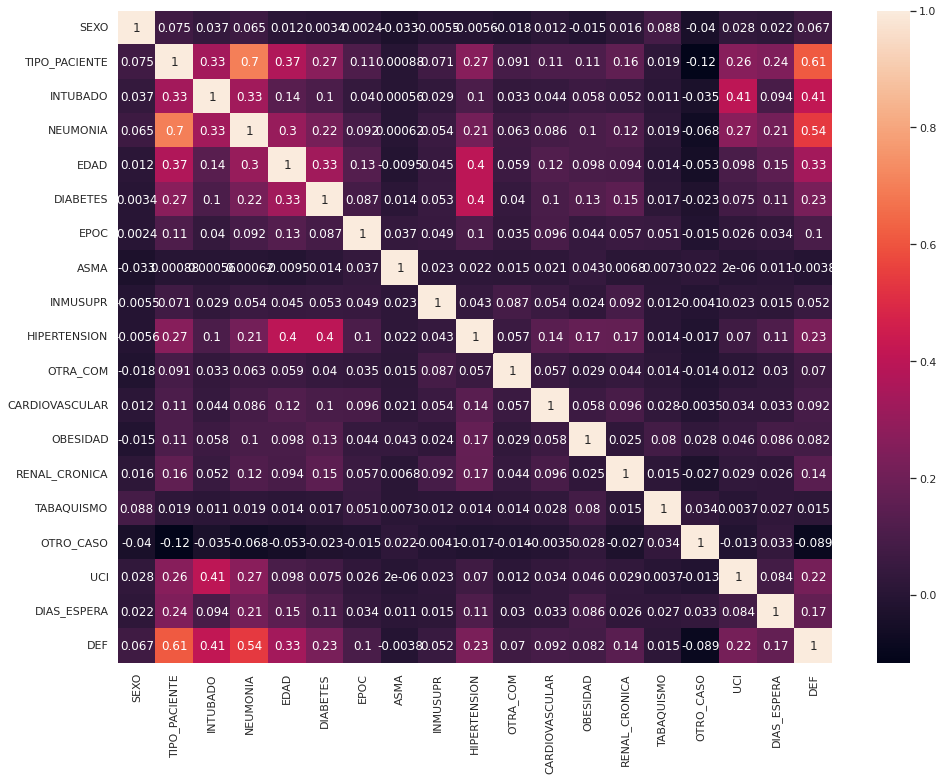

In [32]:
#Creemos un mapa de calor con las correlaciones de estas variables (FECHA_DEF no es incluída por no ser una variable numérica)
f5=plt.figure(figsize=(16, 12))
sns.heatmap(cc.corr(), annot=True);

In [33]:
#Es importante notar que Tipo de paciente mide si el paciente fue hospitalizado o no
#En ese sentido pacientes en UCI (unidad de cuidados intensivos) o Intubados son subconjuntos de esa población y su correlación está relacionada al porcentaje que esas poblaciones representan del total de hospitalizaciones

In [34]:
#Fuera de eso podemos notar ahora en orden de importancia las variables que parecen correlacionarsse con una defunción
corr=cc.corr()
corrdef=corr['DEF']
corrdef=corrdef.sort_values(ascending=False)
print(corrdef)

DEF               1.000000
TIPO_PACIENTE     0.614621
NEUMONIA          0.538181
INTUBADO          0.412704
EDAD              0.334433
HIPERTENSION      0.231994
DIABETES          0.226272
UCI               0.217432
DIAS_ESPERA       0.168562
RENAL_CRONICA     0.142619
EPOC              0.100930
CARDIOVASCULAR    0.092338
OBESIDAD          0.082106
OTRA_COM          0.070342
SEXO              0.066761
INMUSUPR          0.052360
TABAQUISMO        0.015113
ASMA             -0.003843
OTRO_CASO        -0.089305
Name: DEF, dtype: float64


In [35]:
#Intentemos ahora crear modelos con estos datos

In [36]:
#Evaluaremos estos modelos midiendo su precisión, sensibilidad y especificidad

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB

In [38]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")

In [40]:
from random import sample

In [53]:
#Realizamos la segmentación de nuestros datos tomando una muestra representativa de 1 millón de registros
#Esto nos permite computar y evaluar los modelos en esta plataforma
cc2=cc.sample(1000000)
x = cc2.drop(columns=['FECHA_DEF','DEF'])
y = cc2['DEF']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
#Y creamos y evaluamos distintos modelos

In [49]:
#Red Neuronal Artificial
NeuralNetwork = MLPClassifier(hidden_layer_sizes=(10,4),
                            max_iter=2000,
                            activation ='logistic',
                            tol= 1e-8)

NeuralNetwork.fit(x_train, y_train)
y_pred = NeuralNetwork.predict(x_test)

In [50]:
#Red Neuronal Artificial Evaluación
print(evaluar(y_test, y_pred))
y_pred=[]

[[278707   3823]
 [  9027   8443]]
True positives: 8443
True negatives: 278707
False positives: 3823
False negative: 9027
Precision:95.71666666666667%
Sensibilidad:48.32856325128792%
Especificidad:98.64686935900613%
None


In [45]:
#Random Forest (árboles de decisión)
RandomForest = RandomForestClassifier(n_estimators = 600)
RandomForest.fit(x_train, y_train)
y_pred = RandomForest.predict(x_test)

In [46]:
#Random Forest Evaluación
print(evaluar(y_test, y_pred))
y_pred=[]

[[276143   6387]
 [  8023   9447]]
True positives: 9447
True negatives: 276143
False positives: 6387
False negative: 8023
Precision:95.19666666666666%
Sensibilidad:54.075558099599306%
Especificidad:97.7393551127314%
None


In [47]:
#Support Vector Machine
SupportVectorMachine = SVC()
SupportVectorMachine.fit(x_train, y_train) 
y_pred = SupportVectorMachine.predict(x_test) 

In [48]:
#Support Vector Machine Evaluación
print(evaluar(y_test, y_pred))
y_pred=[]

[[278936   3594]
 [  9441   8029]]
True positives: 8029
True negatives: 278936
False positives: 3594
False negative: 9441
Precision:95.655%
Sensibilidad:45.95878649112765%
Especificidad:98.7279226984745%
None


In [51]:
#Clasificador Naïve Bayes
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train) 
y_pred = NaiveBayes.predict(x_test) 

In [52]:
#Clasificador Naïve Bayes Evaluación
print(evaluar(y_test, y_pred))
y_pred=[]

[[262656  19874]
 [  3311  14159]]
True positives: 14159
True negatives: 262656
False positives: 19874
False negative: 3311
Precision:92.27166666666666%
Sensibilidad:81.0475100171723%
Especificidad:92.96570275722932%
None
